In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs # MAPS!!!
import cartopy.feature as cfeature
import cartopy.io.shapereader as shp
import xarray as xr
import pandas as pd

In [2]:
# assign a "file id" to the netcdf file
ksp_fid = nc.Dataset('co3satarag_1975-2014_his.nc')
co3_fid = nc.Dataset('co3_1975-2014_his.nc')
# extract the variable from the netcdf file. 
# you can name it whatever you want but best to use something you can rememver
co3sat = ksp_fid.variables['co3satarag'][:].squeeze()
co3 = co3_fid.variables['co3'][:].squeeze()

In [3]:
# getting coordinate variables
clat = np.append(ksp_fid.variables['lat_bnds'][:,0],ksp_fid.variables['lat_bnds'][-1,-1])
clon = np.append(ksp_fid.variables['lon_bnds'][:,0],ksp_fid.variables['lon_bnds'][-1,-1])

In [4]:
# usually the order goes "time", "depth", "latitude", "longitude"
co3sat.shape

(480, 35, 180, 360)

In [6]:
# just using the surface
surf_co3sat = co3sat[:,0,:,:]
surf_co3 = co3[:,0,:,:]

# calculating aragonite saturation state:
#    co3/co3sat = arag saturation state 
surf_arag_sat = np.mean(surf_co3/surf_co3sat,axis=0)

In [7]:
# Now we have the surface values for all times in 1975-2014
surf_co3sat.shape

(480, 180, 360)

In [8]:
np.max(surf_arag_sat)

8.687171427408854

# TEMPLATE

In [9]:
##set the map projection you want to plot on 
#proj = ccrs.Mollweide(central_longitude=240)

##Create a figure - here I have specified a size of 10 (width) x 10 (height). 
##         You can play with these numbers to see what they do. 

#fig = plt.figure(figsize=(10, 10))

## Create an axes instance inside the figure. here we're using "subplot" which is more usually used with multiple plots.
# #Here, you just specify 111 (first row,first column, first plot). Next keyword sets the map projection
#ax = fig.add_subplot(111, projection=proj)

## this tells matplotlib to include the entire earth, not just the limits of the data
#ax.set_global()

## Add some land and coastline details. zorder is the height relative to other layers. 
## If you made zorder small for coastline, it would go under the land coloration
#ax.add_feature(cfeature.LAND,zorder=10)
#ax.add_feature(cfeature.COASTLINE,zorder=11)    

## PLOTTING THE DATA!! pcolor and pcolormesh provide the longitude and latitudes of the corners of the grid cells. 
## "data" is the data you want to plot. vmin, vmax are the value range you want to show in the data. 
## "cmap" is the colormap you use (feel free to try out different ones)
## "transform" helps get the coordinates in the correct format

#P = ax.pcolormesh(clon,clat,surf_arag_sat,vmin=.8,vmax=5,cmap='nipy_spectral',
                  # transform=ccrs.PlateCarree())

## outline the plot
#plt.setp(ax.spines.values(), color='black',zorder=12)

## Get the axes position for adding the colorbar
#pos = ax.get_position()

## define the location where the colorbar axis will go
#cax = fig.add_axes([pos.x0+1.1*pos.width, pos.y0, .07*pos.width, pos.height])

## Add the colorbar
#cbar = plt.colorbar(P,cax=cax)


# Aragonite Saturation State 1975-2014

In [35]:
ksp_fid = nc.Dataset('co3satarag_1975-2014_his.nc')
co3_fid = nc.Dataset('co3_1975-2014_his.nc')
# extract the variable from the netcdf file. 
# you can name it whatever you want but best to use something you can rememver
co3sat = ksp_fid.variables['co3satarag'][:].squeeze()
co3 = co3_fid.variables['co3'][:].squeeze()

In [36]:
clat = np.append(ksp_fid.variables['lat_bnds'][:,0],ksp_fid.variables['lat_bnds'][-1,-1])
clon = np.append(ksp_fid.variables['lon_bnds'][:,0],ksp_fid.variables['lon_bnds'][-1,-1])

In [37]:
co3sat.shape

(480, 35, 180, 360)

In [38]:
# just using the surface
surf_co3sat = co3sat[:,0,:,:]
surf_co3 = co3[:,0,:,:]

# calculating aragonite saturation state:
#    co3/co3sat = arag saturation state 
surf_arag_sat = np.mean(surf_co3/surf_co3sat,axis=0)

In [39]:
surf_co3sat.shape

(480, 180, 360)

In [40]:
np.max(surf_arag_sat)

8.687171427408854

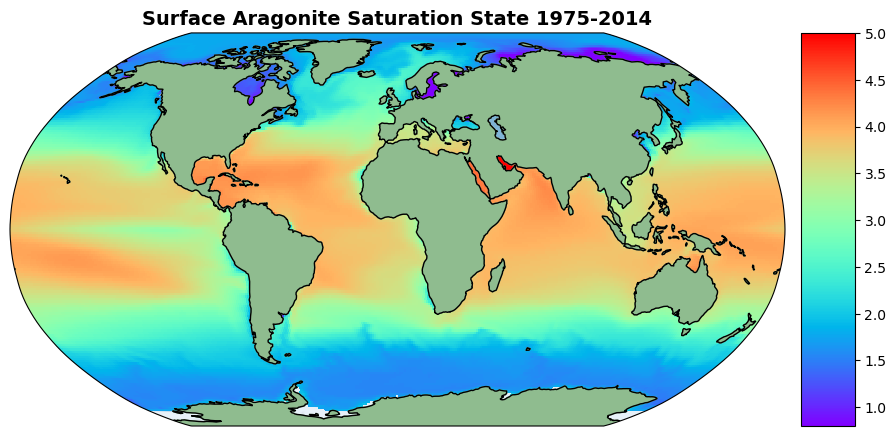

In [53]:
# set the map projection you want to plot on 
proj = ccrs.Robinson(central_longitude=0, globe=None)

# Create a figure - here I have specified a size of 10 (width) x 10 (height). 
#          You can play with these numbers to see what they do. 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=proj)

ax.set_global()            
# Create an axes instance inside the figure. here we're using "subplot" which is more usually used with multiple plots.
# Here, you just specify 111 (first row,first column, first plot). Next keyword sets the map projection


# this tells matplotlib to include the entire earth, not just the limits of the data


# Add some land and coastline details. zorder is the height relative to other layers. 
# If you made zorder small for coastline, it would go under the land coloration

ax.add_feature(cfeature.COASTLINE,zorder=11)   
ax.add_feature(cfeature.LAND, zorder=10, color='darkseagreen' )
ax.set_title(f'Surface Aragonite Saturation State 1975-2014', fontweight='bold', fontsize=14)
# PLOTTING THE DATA!! pcolor and pcolormesh provide the longitude and latitudes of the corners of the grid cells. 
# "data" is the data you want to plot. vmin, vmax are the value range you want to show in the data. 
# "cmap" is the colormap you use (feel free to try out different ones)
# "transform" helps get the coordinates in the correct format

P = ax.pcolormesh(clon,clat,surf_arag_sat,vmin=.8,vmax=5,cmap='rainbow',
                  transform=ccrs.PlateCarree())
ax.stock_img()
# outline the plot
plt.setp(ax.spines.values(), color='black', zorder=12)

# Get the axes position for adding the colorbar
pos = ax.get_position()

# define the location where the colorbar axis will go
cax = fig.add_axes([pos.x0+1.02*pos.width, pos.y0, .07*pos.width, pos.height])

# Add the colorbar
cbar = plt.colorbar(P,cax=cax)
plt.show()

## Future Values

In [54]:
# assign a "file id" to the netcdf file
ksp_fid = nc.Dataset('co3satarag_2061-2100_ssp585.nc')
co3_fid = nc.Dataset('co3_2061-2100_ssp585.nc')
# extract the variable from the netcdf file. 
# you can name it whatever you want but best to use something you can rememver
co3sat = ksp_fid.variables['co3satarag'][:].squeeze()
co3 = co3_fid.variables['co3'][:].squeeze()

# just using the surface
surf_co3sat = co3sat[:,0,:,:]
surf_co3 = co3[:,0,:,:]

# calculating aragonite saturation state:
#    co3/co3sat = arag saturation state 
surf_arag_sat = np.mean(surf_co3/surf_co3sat,axis=0)

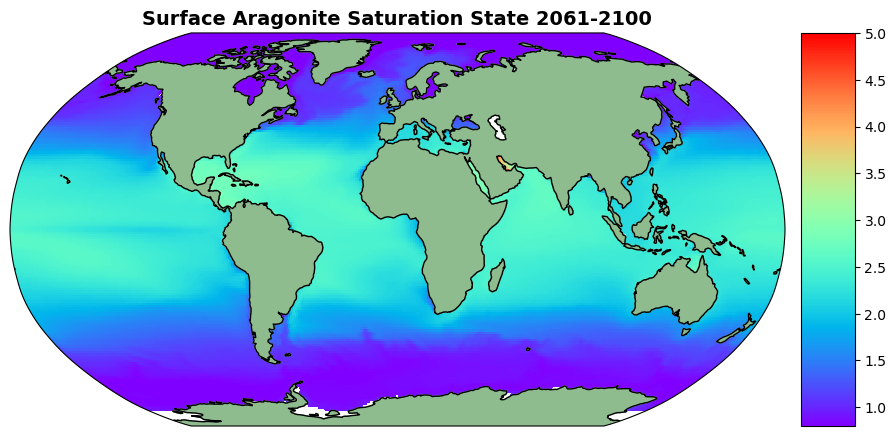

In [55]:
# set the map projection you want to plot on 
proj = ccrs.Robinson(central_longitude=0, globe=None)

# Create a figure - here I have specified a size of 10 (width) x 10 (height). 
#          You can play with these numbers to see what they do. 

fig = plt.figure(figsize=(10, 10))

# Create an axes instance inside the figure. here we're using "subplot" which is more usually used with multiple plots.
# Here, you just specify 111 (first row,first column, first plot). Next keyword sets the map projection
ax = fig.add_subplot(111, projection=proj)

# this tells matplotlib to include the entire earth, not just the limits of the data
ax.set_global()

# Add some land and coastline details. zorder is the height relative to other layers. 
# If you made zorder small for coastline, it would go under the land coloration
ax.add_feature(cfeature.LAND,zorder=10, color='darkseagreen')
ax.add_feature(cfeature.COASTLINE,zorder=11)    
ax.set_title(f'Surface Aragonite Saturation State 2061-2100', fontweight='bold', fontsize=14)
# PLOTTING THE DATA!! pcolor and pcolormesh provide the longitude and latitudes of the corners of the grid cells. 
# "data" is the data you want to plot. vmin, vmax are the value range you want to show in the data. 
# "cmap" is the colormap you use (feel free to try out different ones)
# "transform" helps get the coordinates in the correct format

P = ax.pcolormesh(clon,clat,surf_arag_sat,vmin=.8,vmax=5,cmap='rainbow',
                  transform=ccrs.PlateCarree())

# outline the plot
plt.setp(ax.spines.values(), color='black',zorder=12)

# Get the axes position for adding the colorbar
pos = ax.get_position()

# define the location where the colorbar axis will go
cax = fig.add_axes([pos.x0+1.02*pos.width, pos.y0, .07*pos.width, pos.height])

# Add the colorbar
cbar = plt.colorbar(P,cax=cax)


# Prehistoric Aragonite Saturation Levels

In [48]:
ksp_fid = nc.Dataset('co3satarag_0101-0351_piC_ts.nc')
co3_fid = nc.Dataset('co3_0101-0351_piC.nc')
# extract the variable from the netcdf file. 
# you can name it whatever you want but best to use something you can rememver
co3sat = ksp_fid.variables['co3satarag'][:].squeeze()
co3 = co3_fid.variables['co3'][:].squeeze()

# just using the surface
surf_co3sat = co3sat[:,0,:,:]
surf_co3 = co3[:,0,:,:]

# calculating aragonite saturation state:
#    co3/co3sat = arag saturation state 
surf_arag_sat_pic = np.mean(surf_co3/surf_co3sat,axis=0)

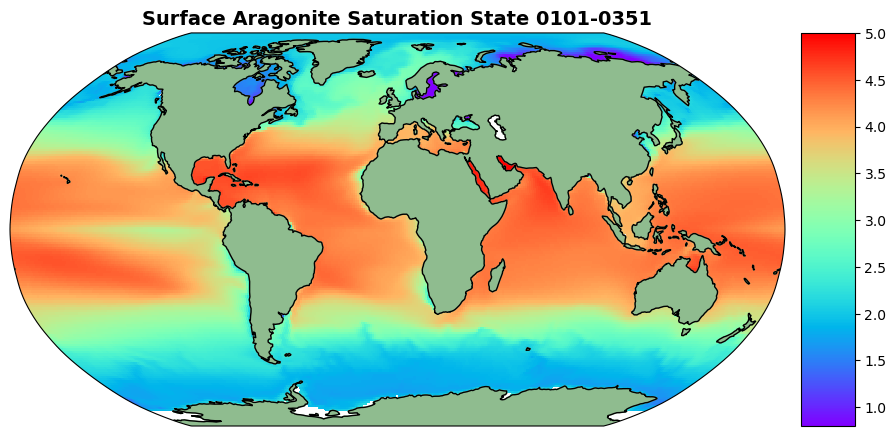

In [51]:
# set the map projection you want to plot on 
proj = ccrs.Robinson(central_longitude=0, globe=None)

fig = plt.figure(figsize=(10, 10))

# Create an axes instance inside the figure. here we're using "subplot" which is more usually used with multiple plots.
# Here, you just specify 111 (first row,first column, first plot). Next keyword sets the map projection
ax = fig.add_subplot(111, projection=proj)

# this tells matplotlib to include the entire earth, not just the limits of the data
ax.set_global()

# Add some land and coastline details. zorder is the height relative to other layers. 
# If you made zorder small for coastline, it would go under the land coloration
ax.add_feature(cfeature.LAND,zorder=10, color='darkseagreen')
ax.add_feature(cfeature.COASTLINE,zorder=11)    
ax.set_title(f'Surface Aragonite Saturation State 0101-0351', fontweight='bold', fontsize=14)
# PLOTTING THE DATA!! pcolor and pcolormesh provide the longitude and latitudes of the corners of the grid cells. 
# "data" is the data you want to plot. vmin, vmax are the value range you want to show in the data. 
# "cmap" is the colormap you use (feel free to try out different ones)
# "transform" helps get the coordinates in the correct format


P = ax.pcolormesh(clon,clat,surf_arag_sat_pic,vmin=.8,vmax=5,cmap='rainbow',
                  transform=ccrs.PlateCarree())

# outline the plot
plt.setp(ax.spines.values(), color='black',zorder=12)

# Get the axes position for adding the colorbar
pos = ax.get_position()

# define the location where the colorbar axis will go
cax = fig.add_axes([pos.x0+1.02*pos.width, pos.y0, .07*pos.width, pos.height])

# Add the colorbar
cbar = plt.colorbar(P,cax=cax)


## Old examples

In [17]:
plt.plot(np.mean(surf_arag_sat_pic,'-o'))

TypeError: 'str' object cannot be interpreted as an integer

In [ ]:
proj = ccrs.PlateCarree()
fig = plt.figure()
ax = fig.add_subplot(111, projection=proj)
P = ax.pcolormesh(clon,clat,surf_arag_sat_pic[0:24:12,:],vmin=0.06,vmax=.07,cmap='nipy_spectral',
                  transform=ccrs.PlateCarree())

pos = ax.get_position()
cax = fig.add_axes([pos.x0+1.1*pos.width, pos.y0, .07*pos.width, pos.height])
cbar = plt.colorbar(P,cax=cax)

In [37]:
pos

Bbox([[0.125, 0.23666666666666664], [0.9, 0.7533333333333334]])

In [44]:
jan_surf_co3 = surf_co3sat[::12,:]

In [45]:
jan_surf_co3.shape

(40, 180, 360)

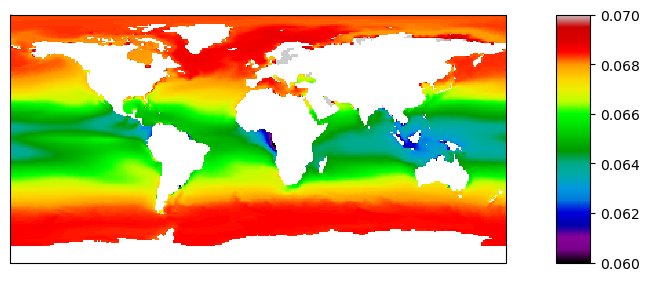

In [48]:
proj = ccrs.PlateCarree()
fig = plt.figure()
ax = fig.add_subplot(111, projection=proj)
P = ax.pcolormesh(clon,clat,np.mean(surf_co3sat[11::12,:],axis=0),vmin=0.06,vmax=.07,cmap='nipy_spectral',
                  transform=ccrs.PlateCarree())

pos = ax.get_position()
cax = fig.add_axes([pos.x0+1.1*pos.width, pos.y0, .07*pos.width, pos.height])
cbar = plt.colorbar(P,cax=cax)

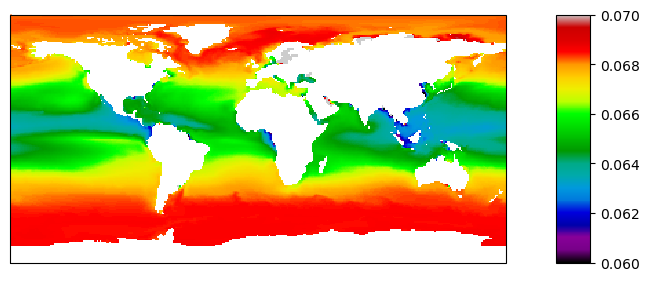

In [50]:
proj = ccrs.PlateCarree()
fig = plt.figure()
ax = fig.add_subplot(111, projection=proj)
P = ax.pcolormesh(clon,clat,np.mean(surf_co3sat[8:48:12,:],axis=0),vmin=0.06,vmax=.07,cmap='nipy_spectral',
                  transform=ccrs.PlateCarree())

pos = ax.get_position()
cax = fig.add_axes([pos.x0+1.1*pos.width, pos.y0, .07*pos.width, pos.height])
cbar = plt.colorbar(P,cax=cax)

In [51]:
surf_co3sat[8:48:12,:].shape

(4, 180, 360)

In [58]:
bot_co3sat = co3sat[:,6,:,:]#.squeeze()

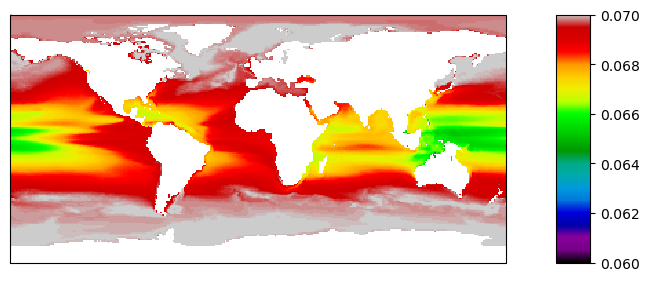

In [59]:
proj = ccrs.PlateCarree()
fig = plt.figure()
ax = fig.add_subplot(111, projection=proj)
P = ax.pcolormesh(clon,clat,np.mean(bot_co3sat,axis=0),vmin=0.06,vmax=.07,cmap='nipy_spectral',
                  transform=ccrs.PlateCarree())

pos = ax.get_position()
cax = fig.add_axes([pos.x0+1.1*pos.width, pos.y0, .07*pos.width, pos.height])
cbar = plt.colorbar(P,cax=cax)